In [1]:
from data.dataset import REFLACXWithClinicalDataset
from model.xami import XAMIMultiModal

from utils.gradcam import get_df_label_pred_img_input, show_gradCAMpp_result

import torch
import os


In [2]:
model_to_load = 'test_0.8408_epoch100_2022-02-06 07_02_26.222274'

In [3]:
# checking if the GPU is available
use_gpu = torch.cuda.is_available()
device = 'cuda' if use_gpu else 'cpu'
print(f"Will be using {device}")

Will be using cuda


In [4]:
# load the dataset
reflacx_dataset = REFLACXWithClinicalDataset(image_size=256)

Positive Loss weight:
[0.768546   0.78635013 0.7937685  0.8338279  0.87388724]
Negative Loss weight:
[0.231454   0.21364985 0.20623146 0.1661721  0.12611276]
Random Loss:
0.21026036153991162


In [5]:
# prepare the model
xami_mutlimodal = XAMIMultiModal(
    reflacx_dataset,
    device,
    use_clinical=True,
    model_dim=64, # was 64
    embeding_dim=64,
    dropout=.2,  # increase the dropout rate did improve the regularization.
    pretrained=True
)

xami_mutlimodal = xami_mutlimodal.to(device)

# trying to load the trained model.
xami_mutlimodal.load_state_dict(torch.load(os.path.join('saved_models', model_to_load), map_location=device))


<All keys matched successfully>

In [17]:
test_instance_idx = 0

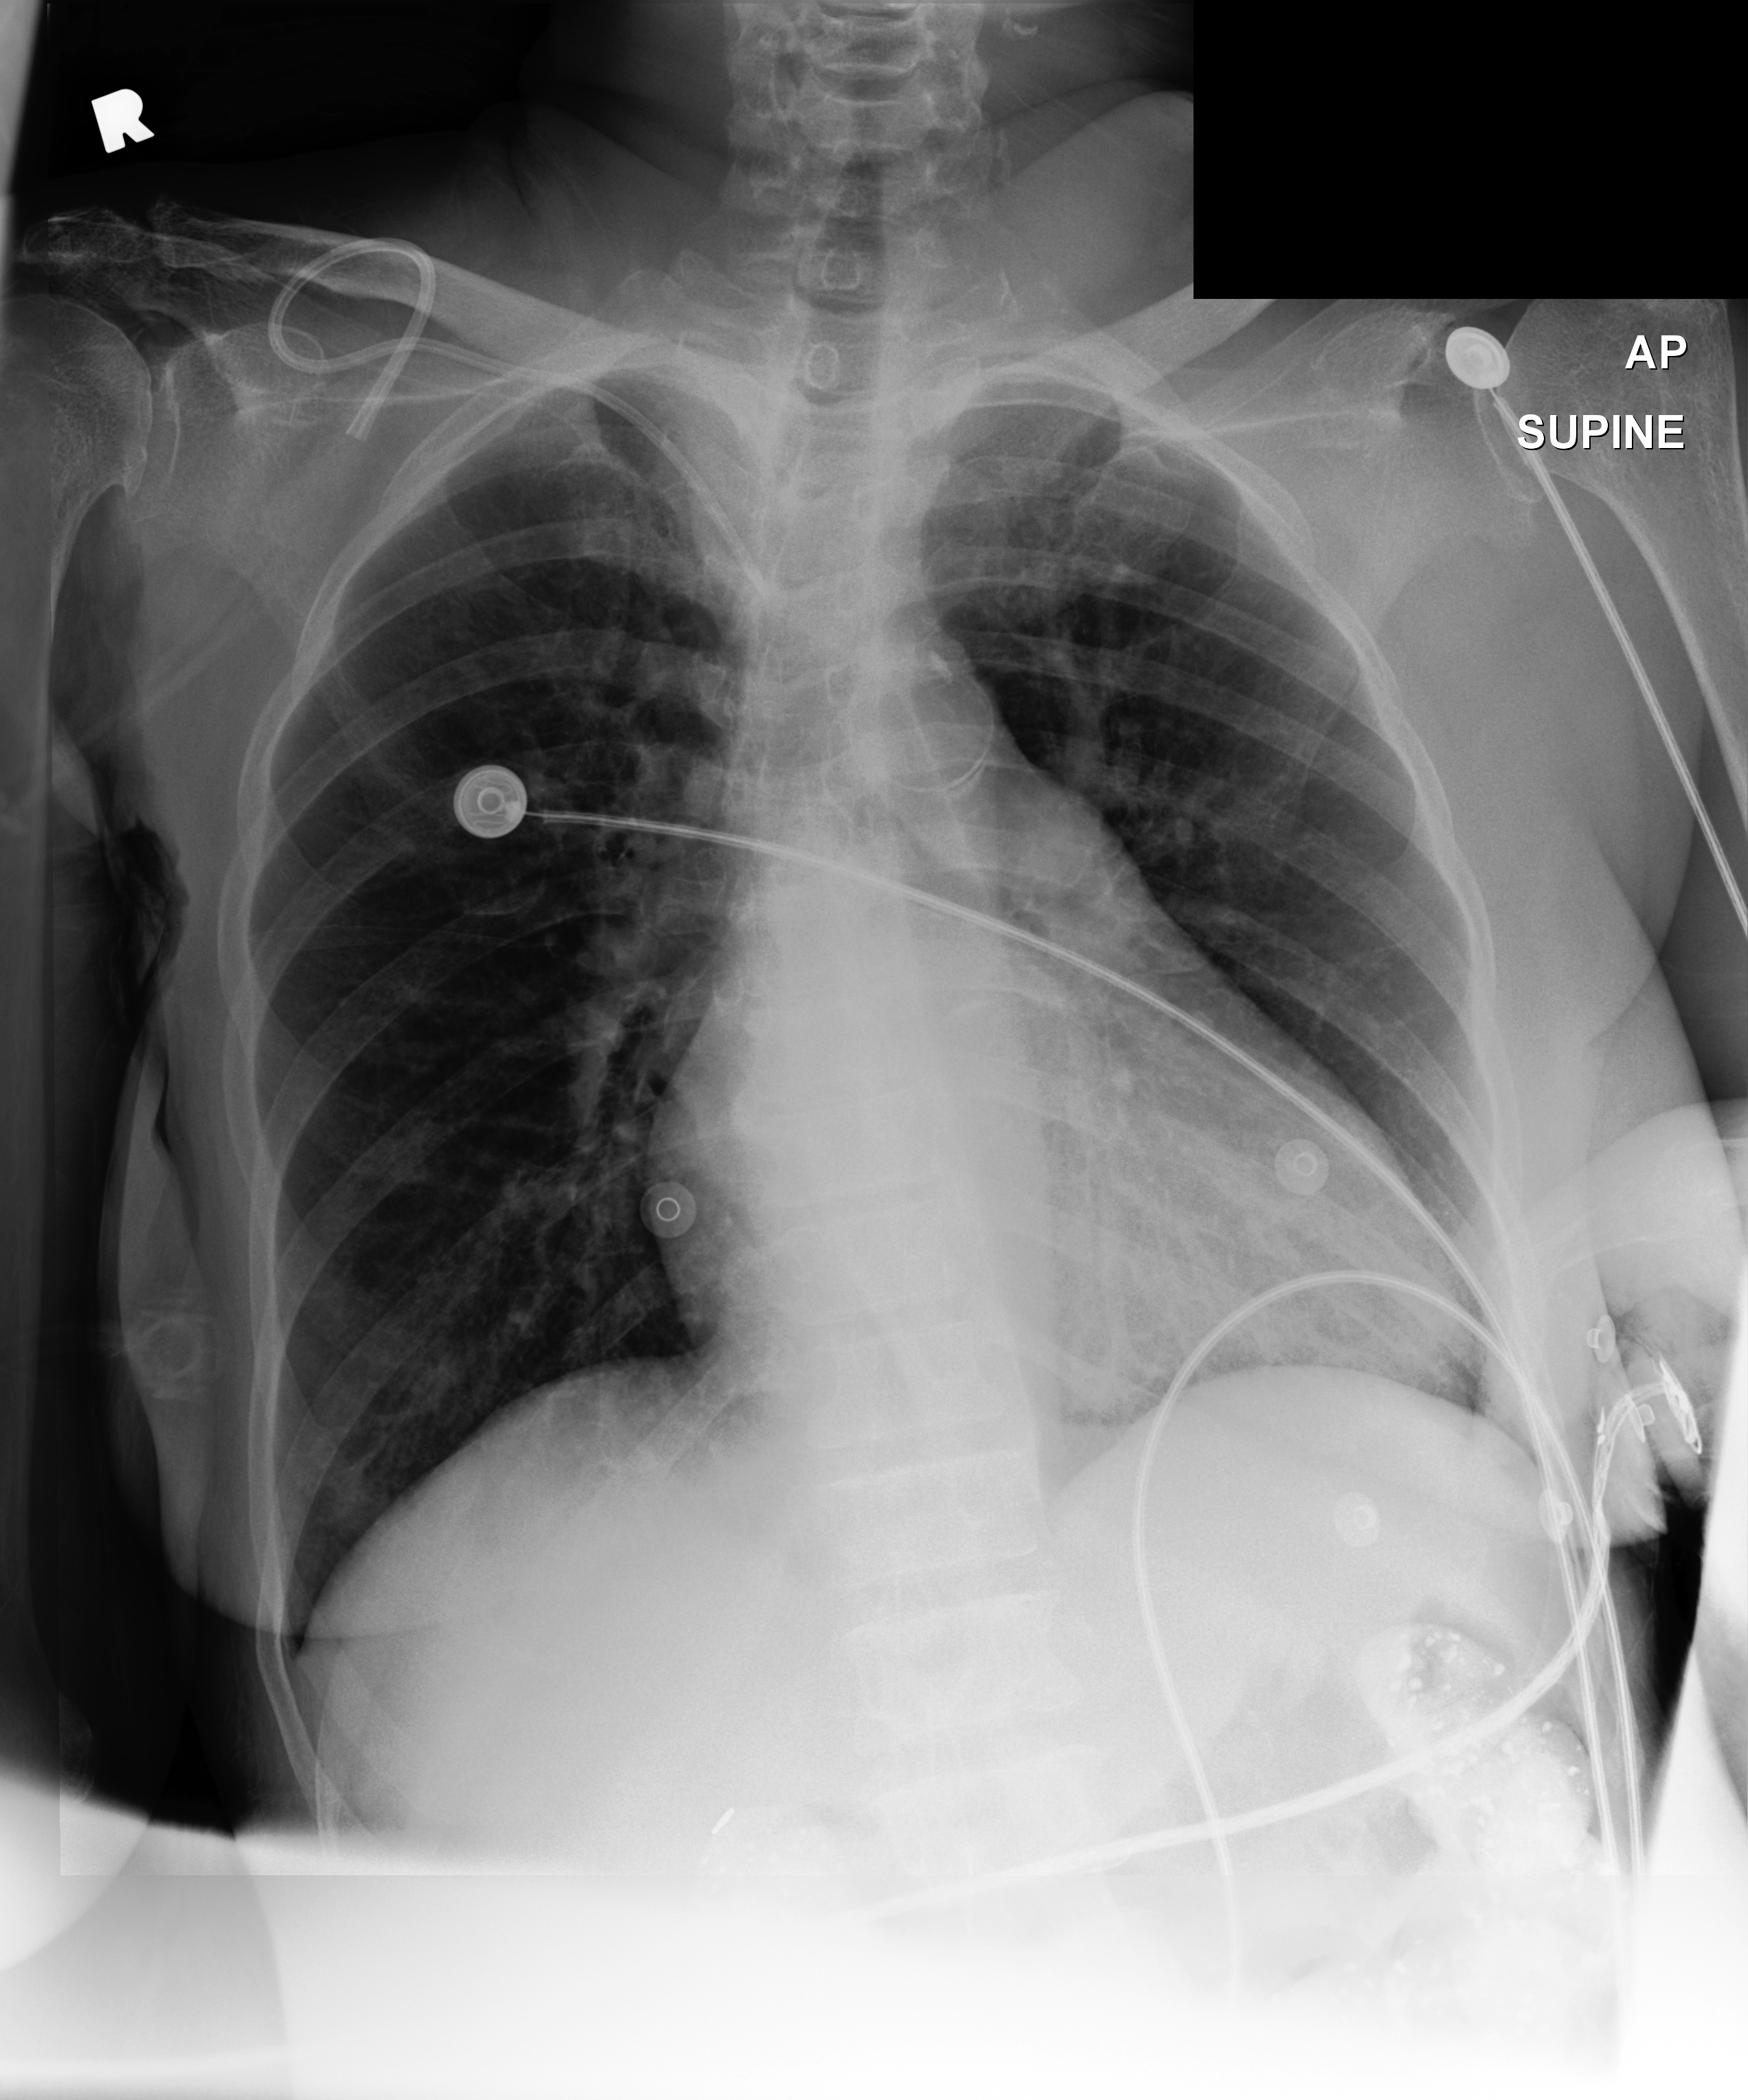

index           id                                      dicom_id  \
0      0  P102R108387  34cedb74-d0996b40-6d218312-a9174bea-d48dc033   

   subject_id   stay_id  study_id  split  \
0    18111516  32067002  55032240  train   

                                          image_path ViewPosition  \
0  D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...           AP   

   image_size_x  ...  Support devices Wide mediastinum  \
0          2544  ...             True            False   

   Abnormal mediastinal contour  Acute fracture  Enlarged hilum  \
0                         False           False           False   

   Hiatal hernia  High lung volume / emphysema  Interstitial lung disease  \
0          False                         False                      False   

   Lung nodule or mass  Pleural abnormality  
0                False                False  

[1 rows x 42 columns]

Enlarged cardiac silhouette  Atelectasis  Pleural abnormality  \
0                         True        False                False   

   Consolidation  Pulmonary edema  
0          False            False

Enlarged cardiac silhouette  Atelectasis  Pleural abnormality  \
0                     0.804357     0.305454             0.002572   

   Consolidation  Pulmonary edema  
0       0.196375         0.114439

In [18]:
df, labels_df, pred_df, img, model_input = get_df_label_pred_img_input(
    xami_mutlimodal, reflacx_dataset, test_instance_idx, device)

display(img)
display(df)
display(labels_df)
display(pred_df)

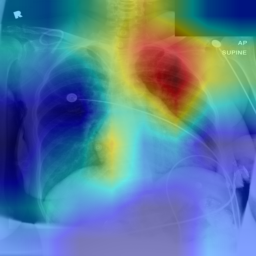

In [21]:
show_gradCAMpp_result(reflacx_dataset, xami_mutlimodal, 'Enlarged cardiac silhouette', img, model_input, use_full_features=False)